# FINAL PROJECT- BANK MARKETING

Name: VARSHA N NAIR

Organization: Entri  Elevate

Date: 13-01-2025

# Overview of the Problem Statement:


The problem statement focuses on predicting whether a client will subscribe to a term deposit based on data from a Portuguese bank's phone call marketing campaigns. The dataset contains 45,211 entries with 17 features that include client demographics, financial attributes, and campaign specifics.

The goal is to develop and evaluate a machine learning model that improves the efficiency of future marketing campaigns by accurately identifying potential subscribers.

# Objective:

The objective is to Develop a machine learning model to accurately predict client subscription to term deposits, thereby enhancing the efficiency of future marketing campaigns.

# Data Description:

The Bank Marketing dataset contains data from direct phone call marketing campaigns conducted by a Portuguese banking institution. It includes 45,211 instances and 17 features, capturing client demographics, contact details, and campaign specifics.

Source: UCI Machine Learning Repository ,Link: https://doi.org/10.24432/C5K306

In [43]:
#Import Necessary Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import zscore, skew 
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load the dataset into a DataFrame
data = pd.read_csv('bank12.csv',delimiter=';')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_yes
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
bank_df=pd.DataFrame(data)

In [5]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_yes
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [6]:
# Display the summary of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0    age           4521 non-null   int64 
 1     job          4521 non-null   object
 2     marital      4521 non-null   object
 3     education    4521 non-null   object
 4     default      4521 non-null   object
 5     balance      4521 non-null   int64 
 6     housing      4521 non-null   object
 7     loan         4521 non-null   object
 8     contact      4521 non-null   object
 9     day          4521 non-null   int64 
 10    month        4521 non-null   object
 11    duration     4521 non-null   int64 
 12    campaign     4521 non-null   int64 
 13    pdays        4521 non-null   int64 
 14    previous     4521 non-null   int64 
 15    poutcome     4521 non-null   object
 16    y_yes        4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [7]:
# Display statistical summary of numerical columns
print(data.describe())

               age     balance          day     duration     campaign    \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

           pdays     previous    
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  


In [8]:
# Removing the columns named "pdays" and "previous"  

In [9]:
data = data.drop(['  pdays  ','  previous  '], axis=1)

In [10]:
print(data.head())

   age            job      marital      education    default     balance    \
0   30     unemployed      married        primary         no          1787   
1   33       services      married      secondary         no          4789   
2   35     management       single       tertiary         no          1350   
3   30     management      married       tertiary         no          1476   
4   59    blue-collar      married      secondary         no             0   

   housing     loan       contact     day    month     duration    \
0       no       no      cellular        19    oct             79   
1      yes      yes      cellular        11    may            220   
2      yes       no      cellular        16    apr            185   
3      yes      yes       unknown         3    jun            199   
4      yes       no       unknown         5    may            226   

    campaign     poutcome     y_yes   
0            1    unknown      no     
1            1    failure      no     

# Data preprocessing:


In [11]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 age             0
 job            0
 marital        0
 education      0
 default        0
 balance        0
 housing        0
 loan           0
 contact        0
 day            0
 month          0
 duration       0
 campaign       0
 poutcome       0
 y_yes          0
dtype: int64


In [12]:
# Impute missing numerical values with mean
num_imputer = SimpleImputer(strategy='mean')
data[data.select_dtypes(include=['float64', 'int64']).columns] = num_imputer.fit_transform(data.select_dtypes(include=['float64', 'int64']))

In [13]:
# Impute missing categorical values with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
data[data.select_dtypes(include=['object']).columns] = cat_imputer.fit_transform(data.select_dtypes(include=['object']))

In [14]:
print("Missing values after handling:\n", data.isnull().sum())
print("Missing values have been successfully handled.")

Missing values after handling:
 age             0
 job            0
 marital        0
 education      0
 default        0
 balance        0
 housing        0
 loan           0
 contact        0
 day            0
 month          0
 duration       0
 campaign       0
 poutcome       0
 y_yes          0
dtype: int64
Missing values have been successfully handled.


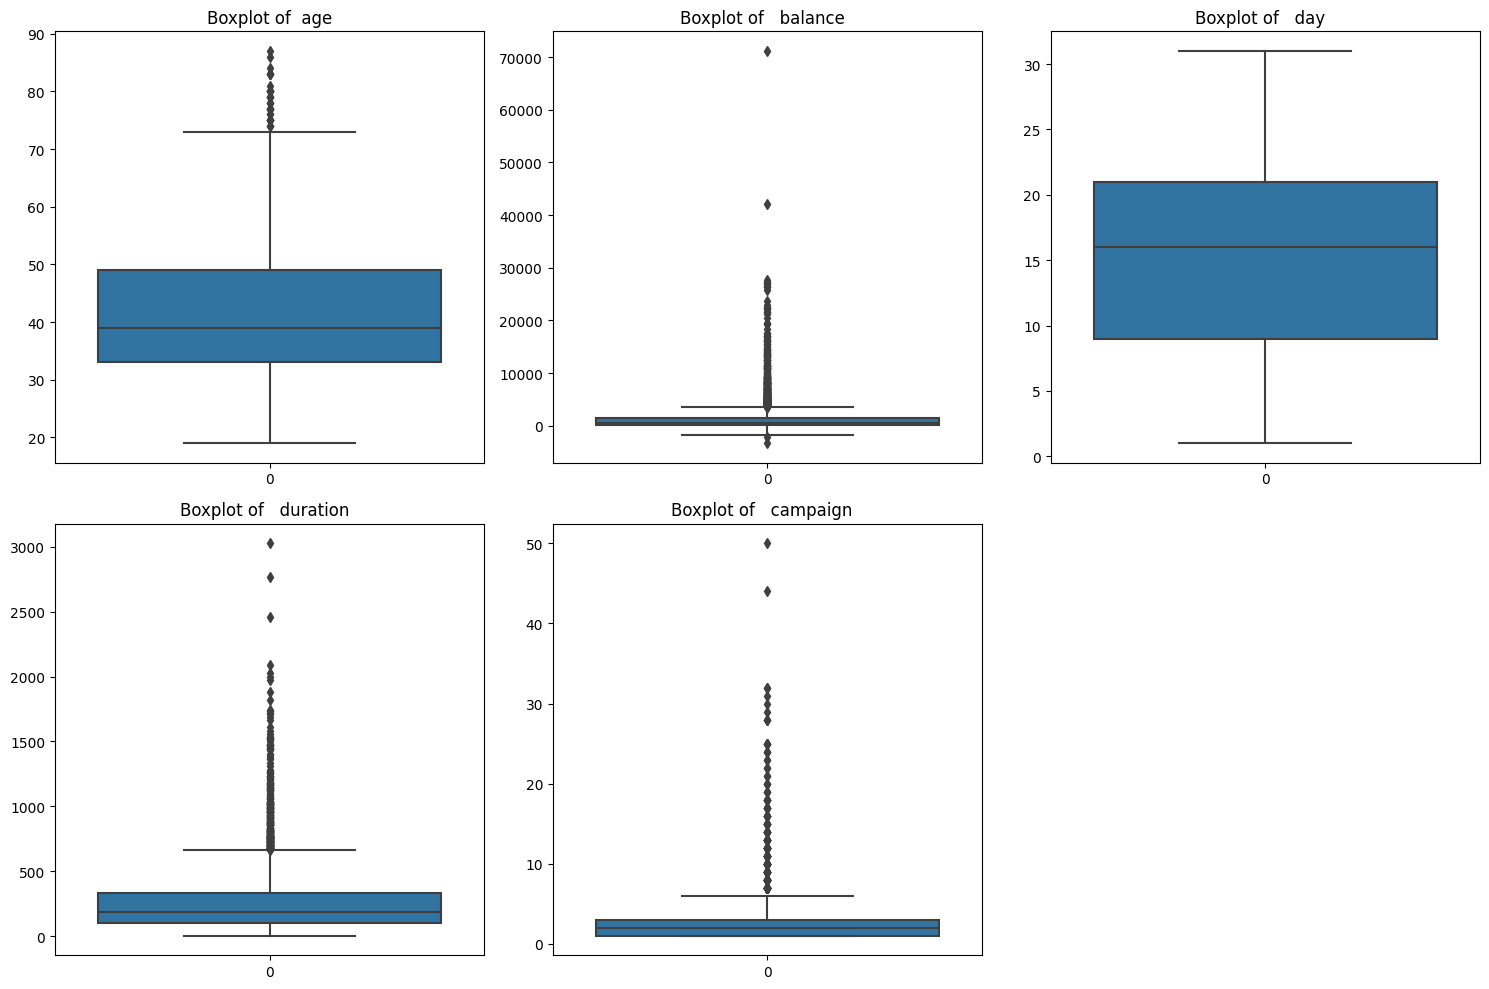

In [15]:
#Check for and Remove Outliers
# Box plot to visualize outliers

# Select numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Create subplots with 3 boxplots in one row
fig, axes = plt.subplots(nrows=(len(numerical_cols) + 2) // 3, ncols=3, figsize=(15, 5 * ((len(numerical_cols) + 2) // 3)))

# Flatten axes for easier indexing (works even if fewer than 3 columns exist)
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(numerical_cols):
    sns.boxplot(data[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Hide any unused subplots
for j in range(len(numerical_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [16]:
# Remove outliers using IQR
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

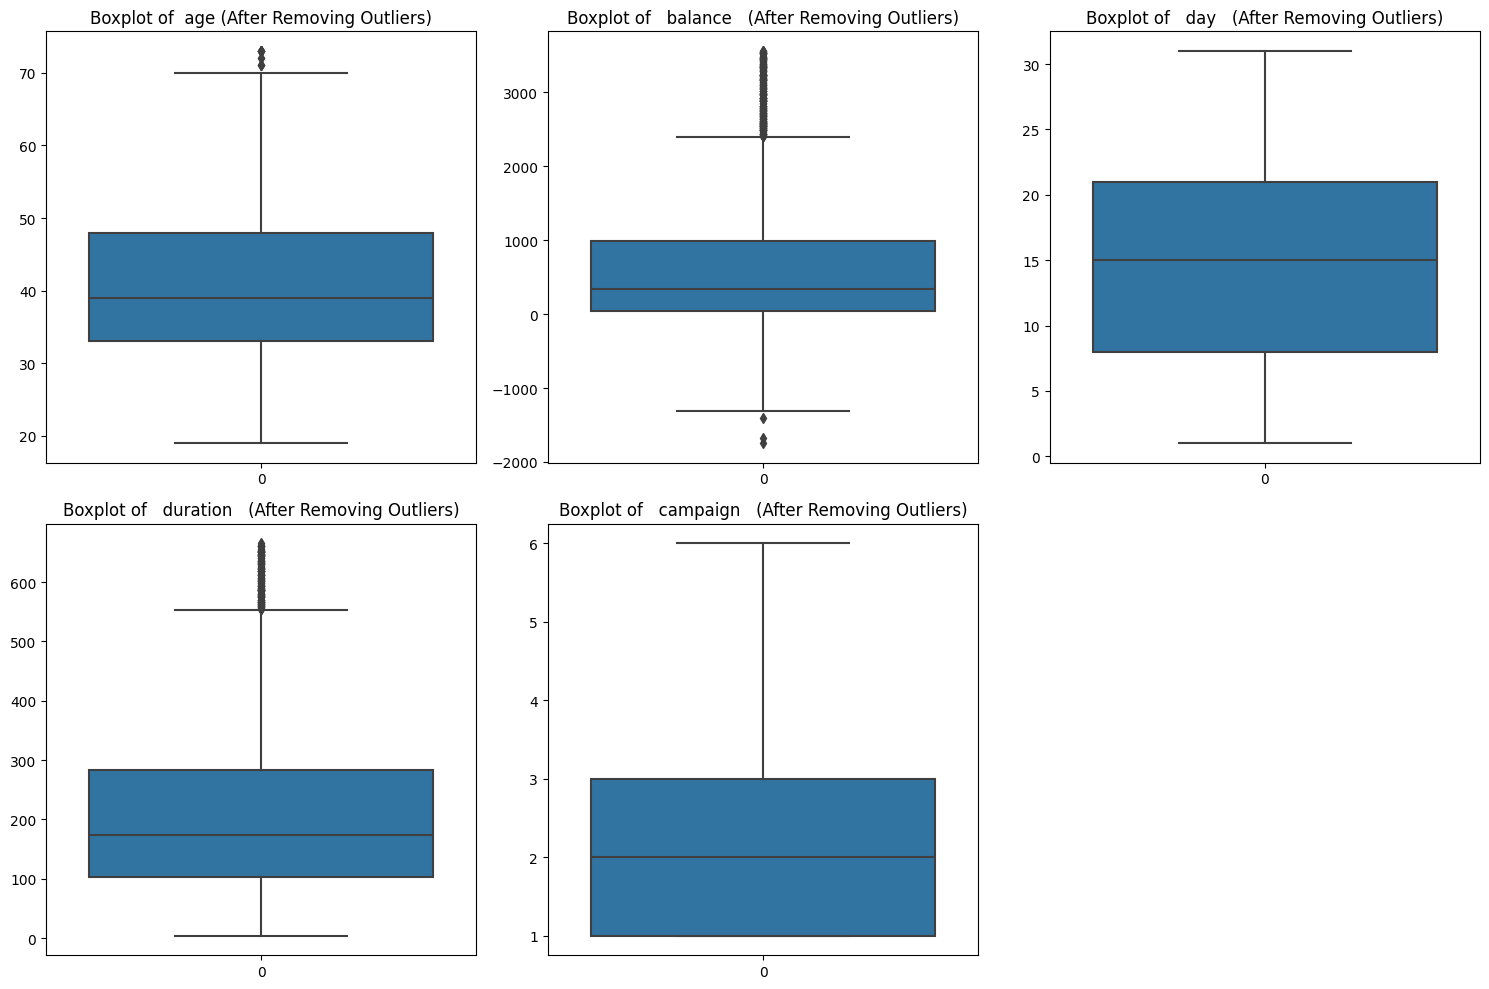

In [17]:
# Boxplot After Removing Outliers 

fig, axes = plt.subplots(nrows=(len(numerical_cols) + 2) // 3, ncols=3, figsize=(15, 5 * ((len(numerical_cols) + 2) // 3)))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot each boxplot after removing outliers
for i, col in enumerate(numerical_cols):
    sns.boxplot(data[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col} (After Removing Outliers)")

# Hide any unused subplots
for j in range(len(numerical_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [18]:
# Address Skewed Data
# Check skewness
skewness = data[numerical_cols].apply(lambda x: skew(x.dropna()))
print("Skewness before transformation:\n", skewness)

Skewness before transformation:
 age            0.483482
 balance       1.362167
 day           0.160818
 duration      1.068663
 campaign      1.272050
dtype: float64


In [19]:
# Apply PowerTransformer to normalize skewed data
pt = PowerTransformer(method='yeo-johnson')
data[numerical_cols] = pt.fit_transform(data[numerical_cols])

In [20]:
# Validate transformations
skewness_after = data[numerical_cols].apply(lambda x: skew(x))
print("Skewness after transformation:\n", skewness_after)

Skewness after transformation:
 age            0.004445
 balance       0.390832
 day          -0.138222
 duration     -0.018885
 campaign      0.187824
dtype: float64


# Exploratory Data Analysis (EDA):

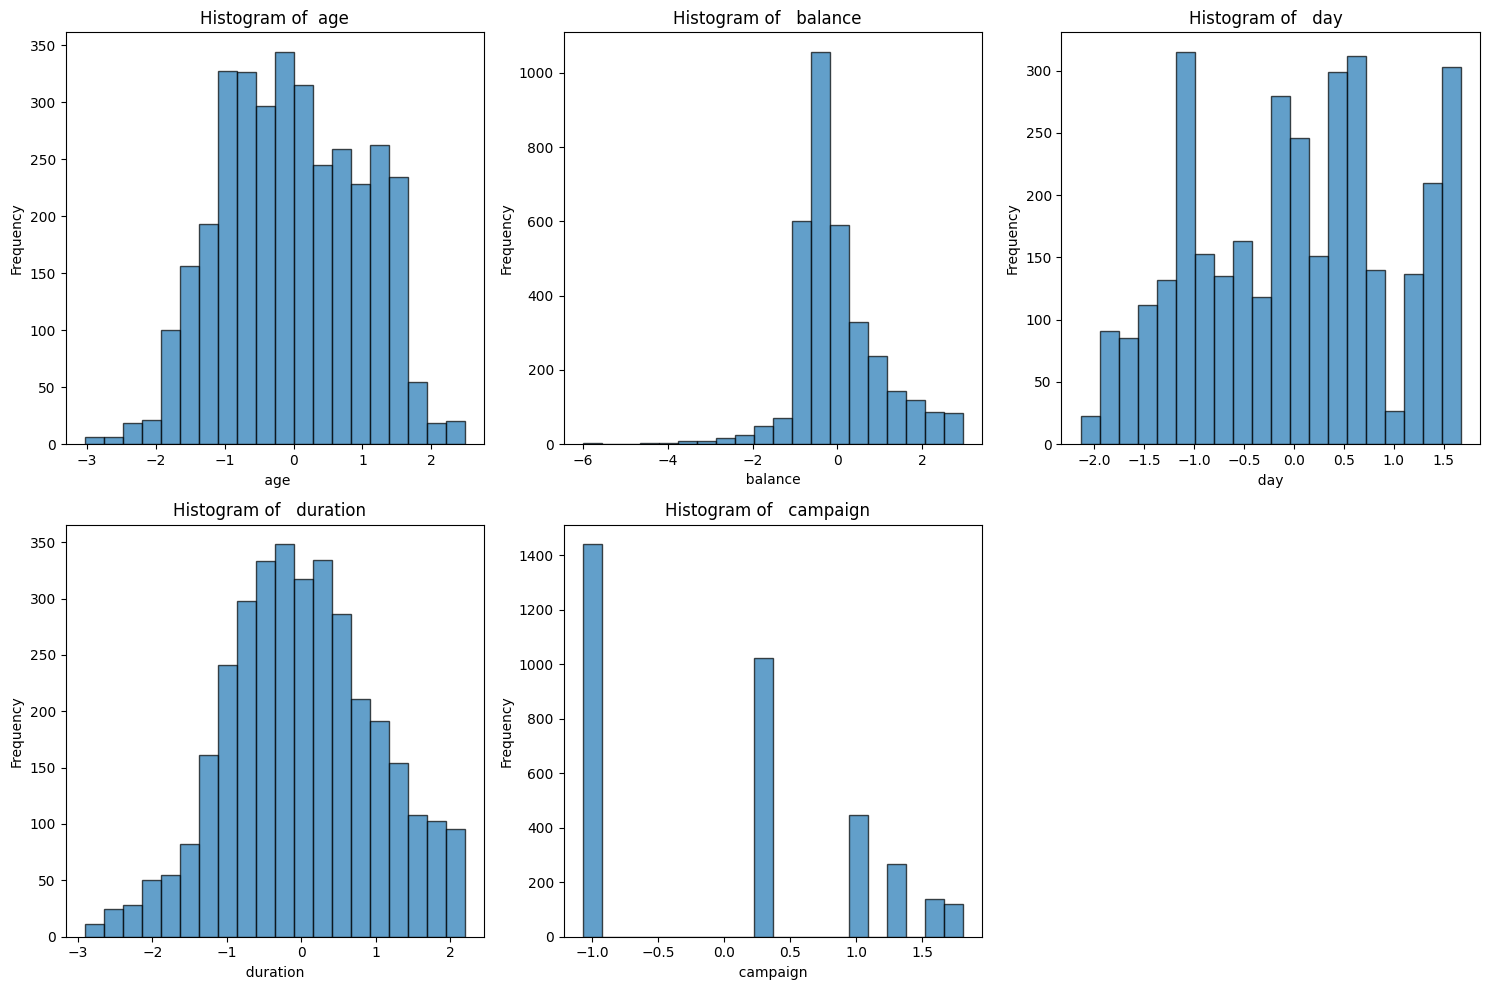

In [21]:
# Histogram: Data distribution for numerical columns
fig, axes = plt.subplots(nrows=(len(numerical_cols) + 2) // 3, ncols=3, figsize=(15, 5 * ((len(numerical_cols) + 2) // 3)))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numerical_cols):
    axes[i].hist(data[col], bins=20, edgecolor='k', alpha=0.7)
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Hide any unused subplots
for j in range(len(numerical_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

C:\Users\varsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\varsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\varsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\varsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

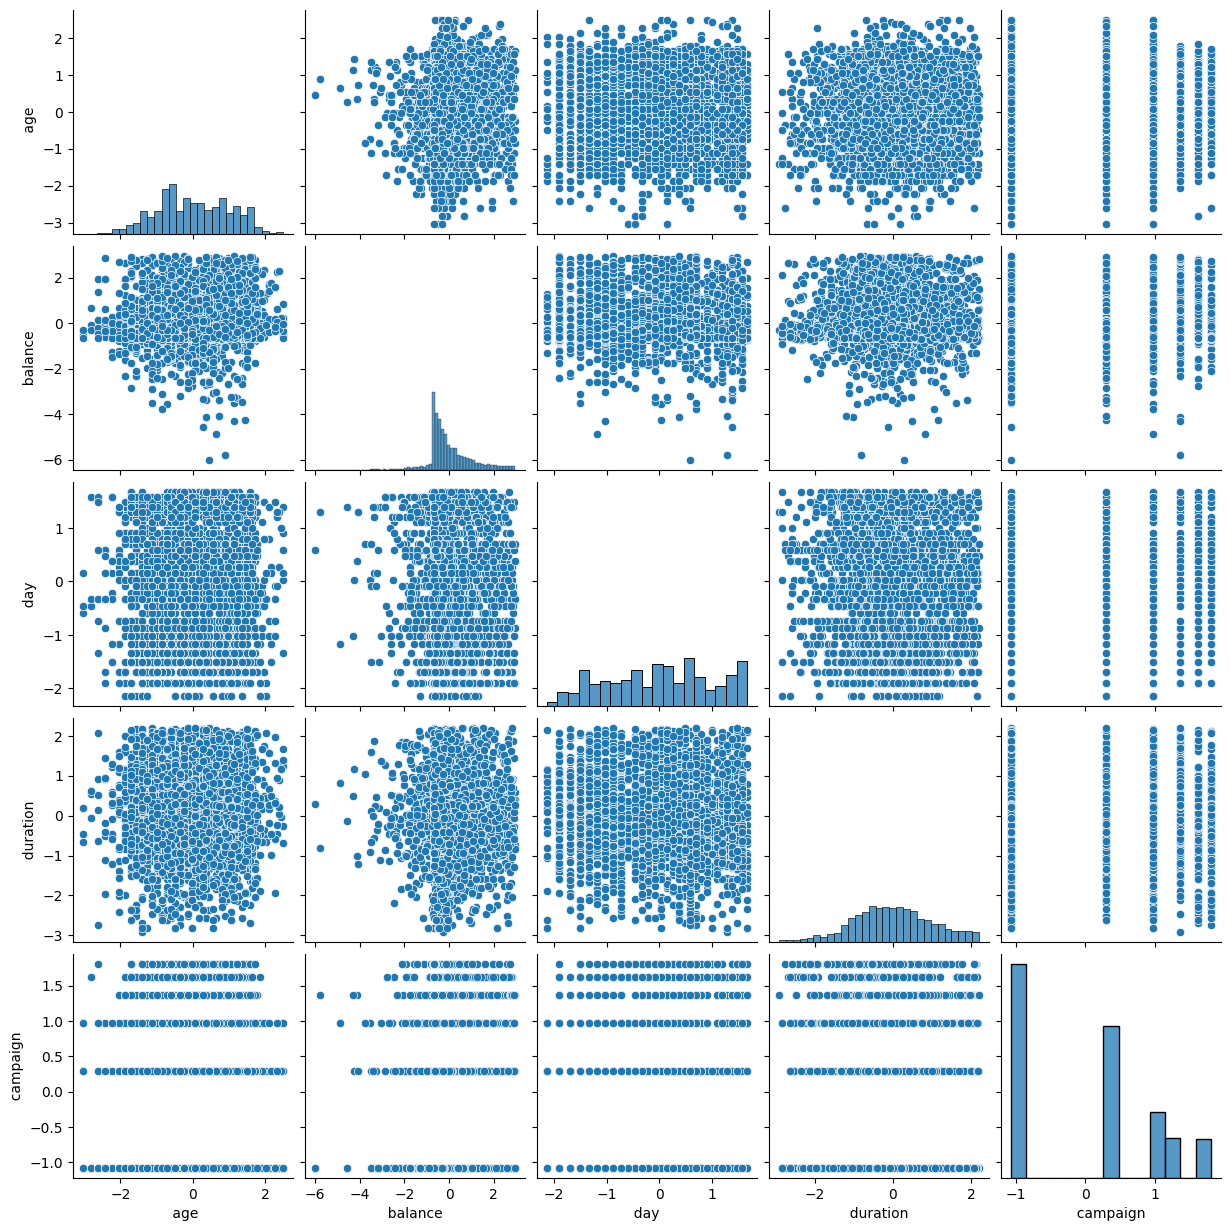

In [22]:
# Pair Plot: Relationships between numerical features
sns.pairplot(data)
plt.show()

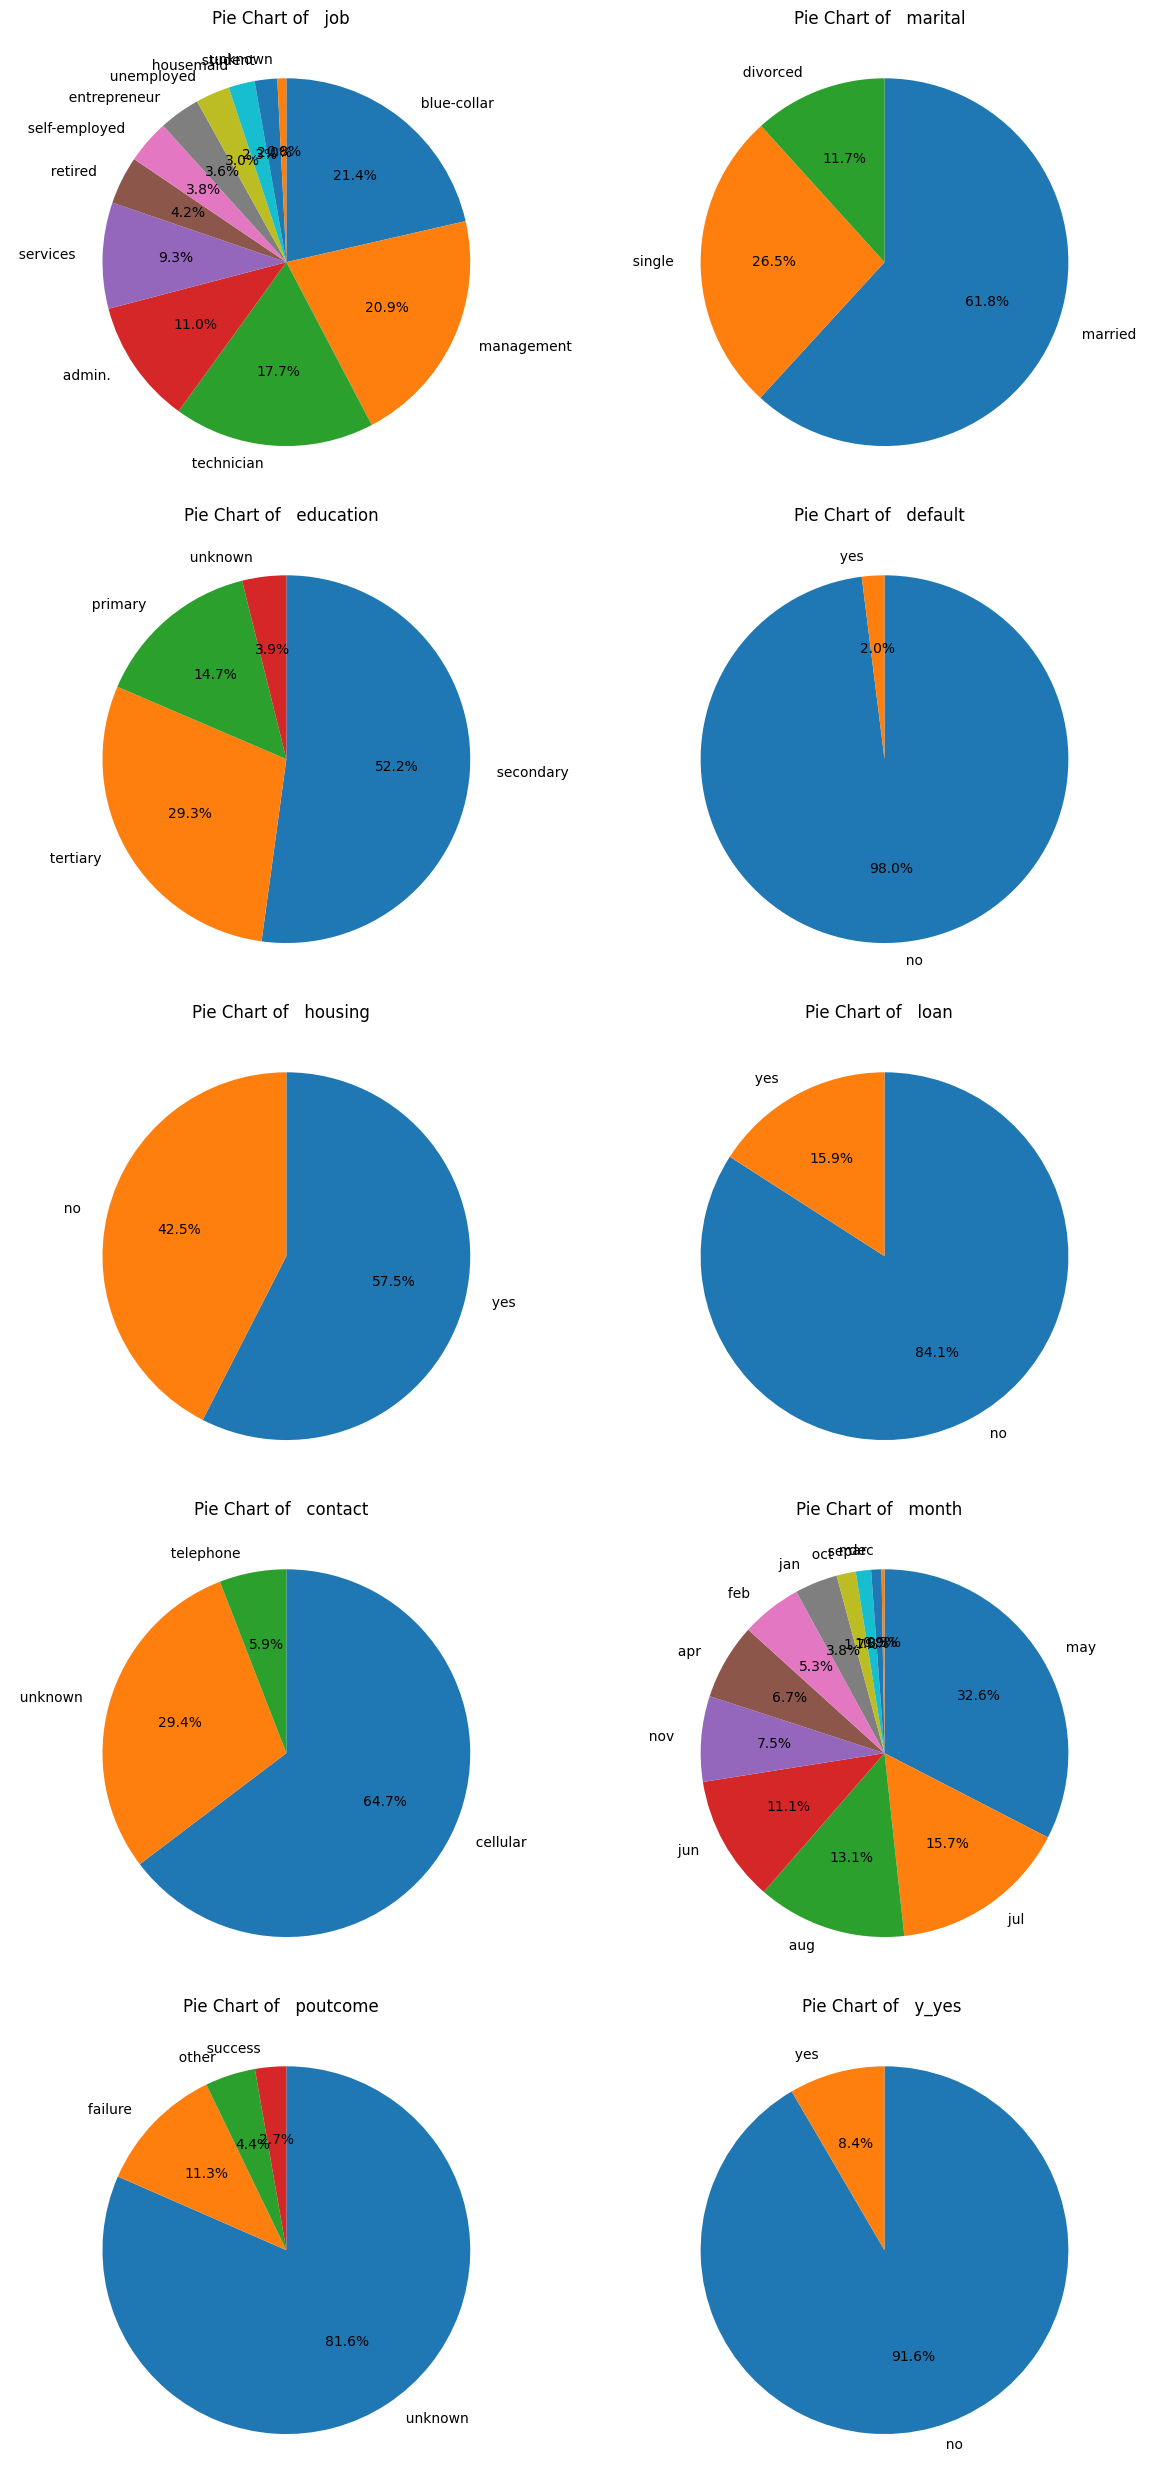

In [23]:
# Pie Diagram: Proportions in categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Create subplots with 2 pie charts per row
fig, axes = plt.subplots(nrows=(len(categorical_cols) + 1) // 2, ncols=2, figsize=(12, 5 * ((len(categorical_cols) + 1) // 2)))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot each pie chart
for i, col in enumerate(categorical_cols):
    data[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        ax=axes[i]
    )
    axes[i].set_title(f"Pie Chart of {col}")
    axes[i].set_ylabel("")  # Hide y-axis label

# Hide any unused subplots
for j in range(len(categorical_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

C:\Users\varsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\varsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\varsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\varsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

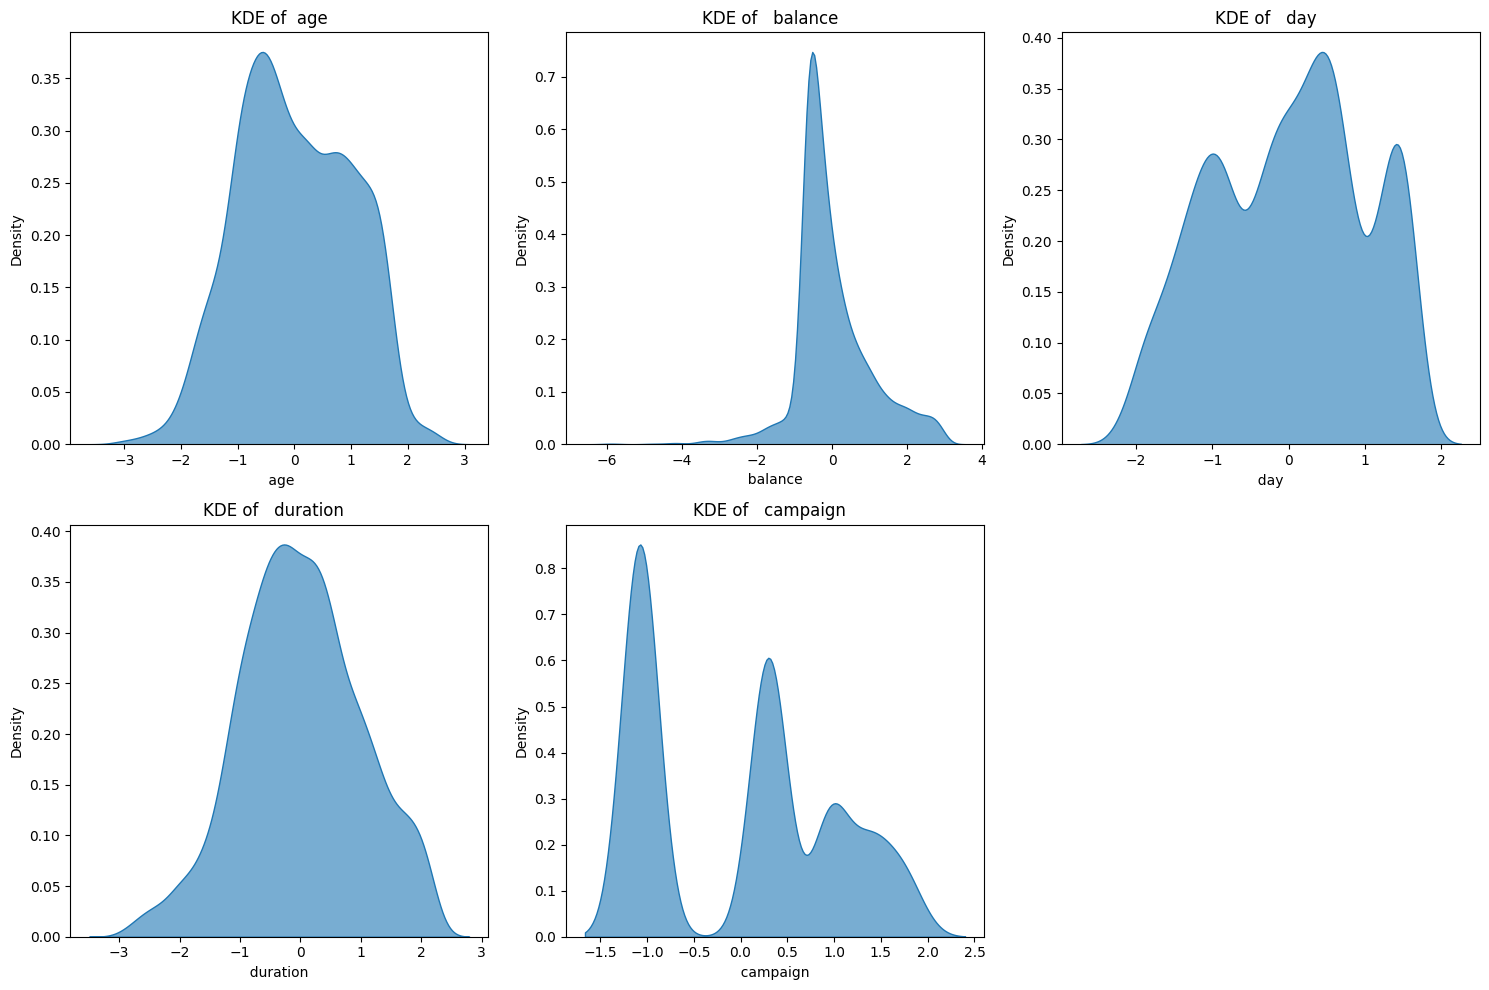

In [24]:
# Kernel Density Estimation (KDE): Data density
fig, axes = plt.subplots(nrows=(len(numerical_cols) + 2) // 3, ncols=3, figsize=(15, 5 * ((len(numerical_cols) + 2) // 3)))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot KDE for each numerical column
for i, col in enumerate(numerical_cols):
    sns.kdeplot(data[col], fill=True, alpha=0.6, ax=axes[i])
    axes[i].set_title(f"KDE of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

# Hide any unused subplots
for j in range(len(numerical_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Feature Engineering:


In [25]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# One-hot encoding for categorical features
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the transformed dataset
print("\nData After One-Hot Encoding:")
print(data_encoded.head())


Data After One-Hot Encoding:
        age   balance       day     duration     campaign    \
0 -1.119367    1.253865  0.485079    -0.965042    -1.074291   
2 -0.480758    0.816764  0.149955     0.051533    -1.074291   
3 -1.119367    0.943824 -1.700107     0.152244     1.366169   
4  1.644462   -0.668349 -1.339882     0.333586    -1.074291   
5 -0.480758    0.193169  0.904731    -0.303491     0.298988   

    job  _  blue-collar     job  _  entrepreneur     job  _  housemaid    \
0                   False                    False                 False   
2                   False                    False                 False   
3                   False                    False                 False   
4                    True                    False                 False   
5                   False                    False                 False   

    job  _  management     job  _  retired    ...   month  _  jun    \
0                  False               False  ...             F

# Feature Extraction:

In [26]:
# Ensure no extra spaces in column names
data.columns = data.columns.str.strip()

# Verify all column names
print(data.columns.tolist())
if 'y_yes' not in data.columns:
    # Assuming 'y' is the categorical column
    data = pd.get_dummies(data, columns=['y'], drop_first=False)
    print(data.columns)  

# Set the target column
target_column = 'y_yes' 
X = data.drop(target_column, axis=1)
y = data[target_column]

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'poutcome', 'y_yes']


In [27]:
# Assuming data is your dataframe and y_yes is the target column
target_column = 'y_yes'
X = data.drop(target_column, axis=1)
y = data[target_column]

# Convert categorical columns to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Identify numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Apply PowerTransformer to normalize skewed data
pt = PowerTransformer(method='yeo-johnson')
X[numerical_cols] = pt.fit_transform(X[numerical_cols])

# Validate transformations (check skewness after transformation)
skewness_after = X[numerical_cols].apply(lambda x: x.skew())
print("Skewness after transformation:\n", skewness_after)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest for feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Select top-k features based on importance
k = 5  # Number of features to select
selected_features = feature_importances.nlargest(k).index
X_selected = X[selected_features]

# Scaling the selected features
# Initialize the scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply Standard Scaling
X_standardized = standard_scaler.fit_transform(X_selected)

# Apply Min-Max Scaling
X_normalized = minmax_scaler.fit_transform(X_selected)

# Convert the scaled data to DataFrames for better readability
X_standardized_df = pd.DataFrame(X_standardized, columns=selected_features)
X_normalized_df = pd.DataFrame(X_normalized, columns=selected_features)

# Display the scaled DataFrames
print("Standardized Features (Z-score Scaling):")
print(X_standardized_df)

print("\nNormalized Features (Min-Max Scaling):")
print(X_normalized_df)

Skewness after transformation:
 age        -0.023735
balance    -0.402880
day        -0.016369
duration   -0.028578
campaign    0.099368
dtype: float64
Standardized Features (Z-score Scaling):
      duration   balance       age       day  poutcome_  success  
0    -0.965086  1.223697 -1.121959  0.454598             -0.167811
1     0.053607  0.840605 -0.474942  0.107431             -0.167811
2     0.154260  0.953712 -1.121959 -1.633122             -0.167811
3     0.335369 -0.647818  1.631929 -1.310496             -0.167811
4    -0.301652  0.258984 -0.474942  0.902862             -0.167811
...        ...       ...       ...       ...                   ...
3427 -1.501837  0.707354 -0.134159  0.568187             -0.167811
3428  2.070079 -0.037638 -0.849876 -1.020374             -0.167811
3429  0.913754 -1.694196 -0.720737  1.651785             -0.167811
3430 -0.411583  0.643608 -1.414546 -1.162304             -0.167811
3431  0.991836  0.642665  0.464257 -1.633122             -0.167811

[3

# Split Data into Training and Testing Sets:

In [28]:
# Convert categorical variables to numerical values
# Assuming job and other relevant columns are categorical
categorical_cols = X.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Define features (X) and target (Y)
X = data.drop(columns=['y_yes'])
Y = data['y_yes']

# Ensure no string-to-float conversion errors
categorical_cols = X.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining Set Shape: X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Testing Set Shape: X_test: {X_test.shape}, Y_test: {Y_test.shape}")


Training Set Shape: X_train: (2745, 40), Y_train: (2745,)
Testing Set Shape: X_test: (687, 40), Y_test: (687,)


# Model Building & Evaluation:



Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       749
           1       0.87      0.86      0.87       751

    accuracy                           0.87      1500
   macro avg       0.87      0.87      0.87      1500
weighted avg       0.87      0.87      0.87      1500

Confusion Matrix:
[[656  93]
 [106 645]]

Model: SVM
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       749
           1       0.88      0.84      0.86       751

    accuracy                           0.87      1500
   macro avg       0.87      0.87      0.87      1500
weighted avg       0.87      0.87      0.87      1500

Confusion Matrix:
[[665  84]
 [118 633]]

Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       749
           1       0.88 

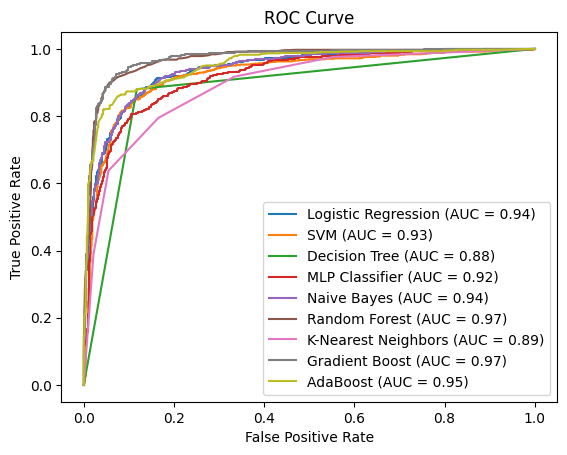

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_curve, 
    auc
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Generate sample data 
X, y = make_classification(
    n_samples=5000, n_features=20, n_classes=2, random_state=42
)

# Split data (use actual dataset instead of generated one)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "MLP Classifier": MLPClassifier(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
}

# Initialize results dictionary
results = {}

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, model_name):
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc(fpr, tpr):.2f})')

# Train and evaluate models
for name, model in models.items():
    print(f"\nModel: {name}")
    
    try:
        # Train the model
        model.fit(X_train, y_train)
        
        # Predictions
        y_pred = model.predict(X_test)
        
        # Predictions probabilities (if supported)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        
        # Evaluation metrics
        report = classification_report(y_test, y_pred, output_dict=True)
        f1_score = report['weighted avg']['f1-score']
        accuracy = report['accuracy']
        
        # Store metrics in results dictionary
        results[name] = {"F1-Score": f1_score, "Accuracy": accuracy}
        
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        
        # Plot ROC Curve
        if y_prob is not None:
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            plot_roc_curve(fpr, tpr, name)
    except Exception as e:
        print(f"Error with model {name}: {e}")

# Display ROC Curve
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [30]:
# Function to find the best model
def find_best_model_simple(evaluation_results, primary_metric='F1-Score'):
    if not evaluation_results:
        print("No models were evaluated.")
        return None
    
    best_model = None
    best_score = float('-inf')

    print("\nModel Performance:")
    for model_name, metrics in evaluation_results.items():
        if primary_metric in metrics:
            score = metrics[primary_metric]
            print(f"{model_name}: {primary_metric} = {score:.4f}")
            
            # Update the best model
            if score > best_score:
                best_score = score
                best_model = model_name
        else:
            print(f"{model_name}: {primary_metric} not found in metrics.")
    
    if best_model is not None:
        print(f"\nBest Model: {best_model} ({primary_metric} = {best_score:.4f})")
    else:
        print("\nNo best model found.")
    return best_model

# Find the best model
best_model = find_best_model_simple(results, primary_metric='F1-Score')



Model Performance:
Logistic Regression: F1-Score = 0.8673
SVM: F1-Score = 0.8653
Decision Tree: F1-Score = 0.8813
MLP Classifier: F1-Score = 0.8406
Naive Bayes: F1-Score = 0.8693
Random Forest: F1-Score = 0.9166
K-Nearest Neighbors: F1-Score = 0.8146
Gradient Boost: F1-Score = 0.9186
AdaBoost: F1-Score = 0.8866

Best Model: Gradient Boost (F1-Score = 0.9186)


# Hyperparameter Tuning:

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for GradientBoostingClassifier
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'subsample': [0.7, 0.8, 0.9, 1.0],
}

# Initialize the GradientBoostingClassifier model
gb = GradientBoostingClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_grid,
    n_iter=20,  # Number of random combinations to try
    cv=3,  # 3-fold cross-validation
    scoring='f1_weighted',  # Optimize for F1-score (weighted)
    verbose=2,  # Show progress
    n_jobs=-1,  # Use all available processors
    random_state=42,
)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Get the best estimator (GradientBoostingClassifier with the best hyperparameters)
best_gb = random_search.best_estimator_

# Print the best hyperparameters
print(f"Best hyperparameters for Gradient Boosting Classifier: {random_search.best_params_}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best hyperparameters for Gradient Boosting Classifier: {'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.01}


# Save the Model:

In [32]:
import joblib

# Save the best Gradient Boosting model
joblib.dump(best_gb, 'GradientBoosting_model.pkl')

print("Model saved as 'GradientBoosting_model.pkl'")


Model saved as 'GradientBoosting_model.pkl'


# Pipeline:

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# Define the pipeline steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step (standard scaling)
    ('gb', GradientBoostingClassifier(random_state=42))  # Gradient Boosting Classifier
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Save the pipeline
pipeline_filename = 'GradientBoosting_model_pipeline.pkl'
joblib.dump(pipeline, pipeline_filename)

print(f"Pipeline saved as '{pipeline_filename}'")

# Load the pipeline (example for later use)
loaded_pipeline = joblib.load(pipeline_filename)

# Example of using the loaded pipeline for predictions
y_pred = loaded_pipeline.predict(X_test)

# You can now use the pipeline for further tasks (like evaluation)
print("\nClassification Report for Loaded Pipeline:")
print(classification_report(y_test, y_pred))


Pipeline saved as 'GradientBoosting_model_pipeline.pkl'

Classification Report for Loaded Pipeline:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       749
           1       0.94      0.90      0.92       751

    accuracy                           0.92      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.92      0.92      0.92      1500



# Test with Unseen Data:

In [41]:
# Load the trained pipeline
pipeline_filename = 'GradientBoosting_model_pipeline.pkl'
loaded_pipeline = joblib.load(pipeline_filename)

# Define the column names (replace with actual feature names from your dataset)
feature_names = [f'feature{i+1}' for i in range(X_train.shape[1])]  # Assuming X_train is your training data

# Generate random unseen data (e.g., 5 samples with N features)
N = X_train.shape[1]  # Number of features
X_unseen_random = np.random.rand(10, N)  # Generate 5 random samples

# Convert to a DataFrame with column names
df_unseen_random = pd.DataFrame(X_unseen_random, columns=feature_names)

# Display the head of the DataFrame
print("Head of the Random Unseen Data (DataFrame):")
print(df_unseen_random.head())

# Predict using the loaded pipeline on the random unseen data
y_unseen_pred = loaded_pipeline.predict(X_unseen_random)

# If the model provides probability predictions, you can also get the probabilities
y_unseen_prob = loaded_pipeline.predict_proba(X_unseen_random)[:, 1]

# Print predictions and probabilities
print("\nPredictions for Random Unseen Data:", y_unseen_pred)
print("Predicted Probabilities for Random Unseen Data:", y_unseen_prob)


Head of the Random Unseen Data (DataFrame):
   feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0  0.220132  0.403856  0.542414  0.768663  0.659479  0.101881  0.229569   
1  0.489395  0.026240  0.736135  0.279898  0.340800  0.177391  0.269037   
2  0.509659  0.125843  0.842156  0.180618  0.000113  0.299137  0.130632   
3  0.212721  0.253337  0.752604  0.609778  0.155126  0.285605  0.757381   
4  0.974440  0.301627  0.999354  0.239195  0.281795  0.419208  0.373170   

   feature8  feature9  feature10  feature11  feature12  feature13  feature14  \
0  0.075936  0.555916   0.831638   0.104108   0.628095   0.009639   0.909589   
1  0.193984  0.764618   0.129926   0.332964   0.005428   0.616705   0.030692   
2  0.039325  0.260683   0.652268   0.141343   0.733849   0.747406   0.536677   
3  0.031245  0.682804   0.507991   0.867151   0.072645   0.392821   0.893950   
4  0.524604  0.959782   0.930842   0.470744   0.512728   0.499026   0.674601   

   feature15  feature16 

In [42]:
# Finding Accuracy
accuracy = accuracy_score(y_unseen_true, y_unseen_pred)
print("Accuracy on Unseen Data:", accuracy)


Accuracy on Unseen Data: 0.4


# Interpretation of Results:

Best Performing Model: The Gradient Boosting model, with an F1-score of 0.9180, is the best performing model, offering the most balanced results across both precision and recall. It has effectively learned the patterns in the data, providing the highest level of accuracy without sacrificing recall, making it an ideal choice for this task.

Other Top Performers: Random Forest and AdaBoost also performed strongly, showing that ensemble models generally offer better performance than individual models like Logistic Regression or SVM.

Need for Improvement: KNN and Logistic Regression showed relatively poor performance, suggesting that these models may not be suitable for this particular dataset without significant feature engineering or hyperparameter tuning.



MODEL PERFOMANCE CHART

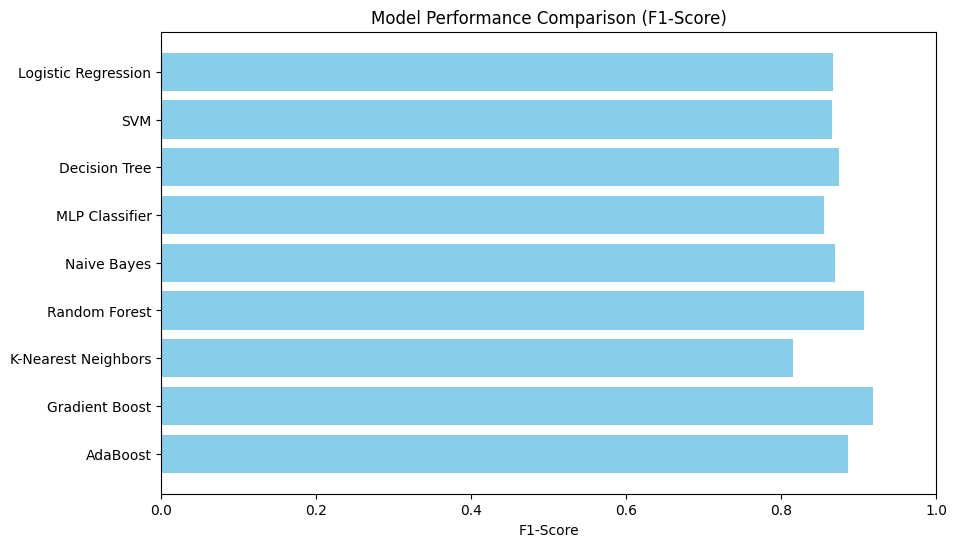

In [36]:
import matplotlib.pyplot as plt

# F1-scores for the models
models = [
    "Logistic Regression", "SVM", "Decision Tree", 
    "MLP Classifier", "Naive Bayes", "Random Forest", 
    "K-Nearest Neighbors", "Gradient Boost", "AdaBoost"
]
f1_scores = [0.8673, 0.8653, 0.8746, 0.8553, 0.8693, 0.9072, 0.8146, 0.9180, 0.8866]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(models, f1_scores, color='skyblue')
plt.xlabel('F1-Score')
plt.title('Model Performance Comparison (F1-Score)')
plt.xlim(0, 1)  # Set the limit from 0 to 1 for F1-Score range
plt.gca().invert_yaxis()  # To have the model with the highest F1-score at the top
plt.show()


Ultimately, the Gradient Boosting model stands out as the best option, offering a solid balance of precision and recall, which is crucial for many real-world applications where both false positives and false negatives need to be minimized.

# Future Work:

Deep Learning: Explore neural networks or hybrid approaches to potentially improve prediction accuracy.

Data Updates: Periodically refresh the dataset with newer campaign data to keep the model relevant.

Imbalanced Data Handling:
Experiment with resampling methods like SMOTE or cost-sensitive learning.

Feature Expansion: Incorporate additional client attributes or external economic indicators to enhance predictive power